In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train=pd.read_csv('datasets/titanic_train.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


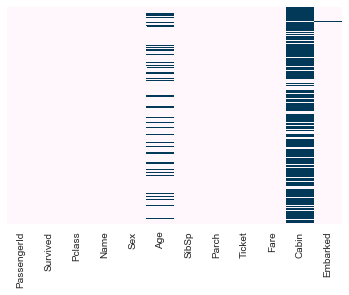

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

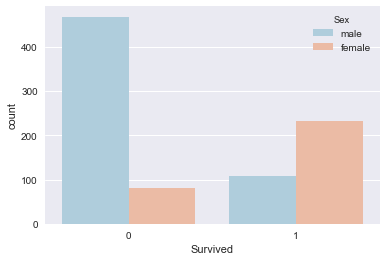

In [13]:
sns.countplot('Survived',data=train,hue='Sex',palette='RdBu_r')

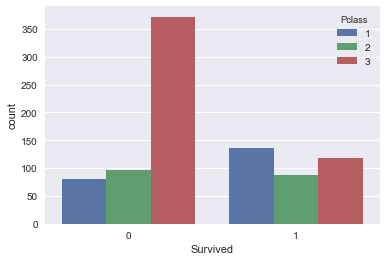

In [17]:
sns.countplot('Survived',data=train,hue='Pclass')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


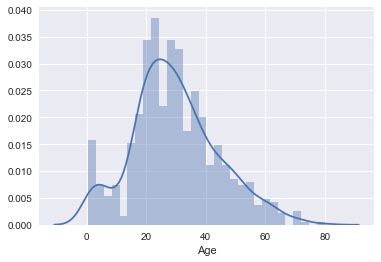

In [25]:
sns.distplot(train['Age'].dropna(),bins=30,hist_kws={'histtype':'stepfilled'})

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


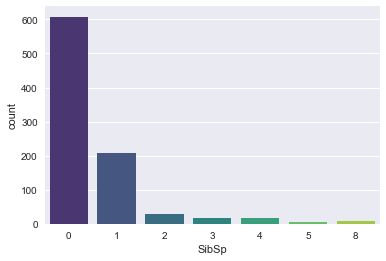

In [28]:
sns.countplot('SibSp',data=train,palette='viridis')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


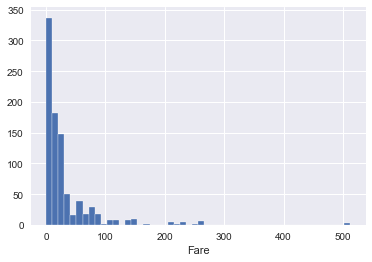

In [36]:
sns.distplot(train['Fare'],kde=False,bins=50,hist_kws={'alpha':1,'edgecolor':'w'})

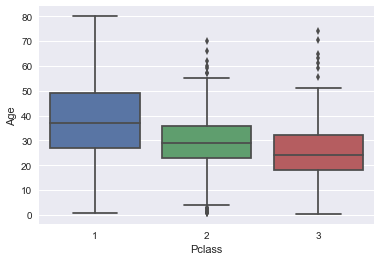

In [39]:
sns.boxplot('Pclass','Age',data=train)

In [40]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [41]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

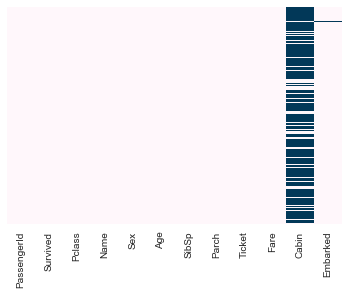

In [43]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

In [44]:
train.drop('Cabin',axis=1,inplace=True)

In [45]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


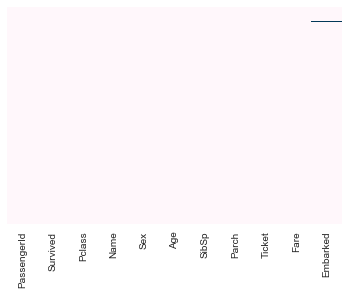

In [46]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

In [47]:
train.dropna(inplace=True)

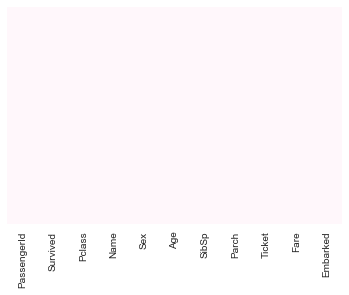

In [48]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

In [49]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [52]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [53]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [54]:
train=pd.concat([train,sex,embark],axis=1)

In [55]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [56]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [61]:
train.drop(['Name', 'Sex','Ticket','Embarked'],axis=1,inplace=True)

SyntaxError: invalid syntax (<ipython-input-61-6eab41ad2eaa>, line 1)

In [62]:
train.drop('PassengerId',inplace=True,axis=1)

In [63]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.25,1,0,1


In [64]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [65]:
from sklearn.cross_validation import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log=LogisticRegression()

In [69]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
predictions=log.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [74]:
from sklearn.metrics import confusion_matrix

In [76]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]
